In [29]:
#call cleaned dataset and use modules
import pandas as pd
import scipy.stats as sp
import random
import numpy as np 
import matplotlib.pyplot as plt

dt= pd.read_csv("../Resources/Cleaned_Cvd.csv")
dt.head()


,Unnamed: 0,General Health,Checkup,Exercise,Heart Disease,Skin Cancer,Other Cancer,Depression,Diabetes,Arthritis,Sex,Age Category,Height (cm),Weight (kg),BMI,Smoking History,Alcohol (Servings/Month),Fruit (Servings/Month),Green Vegetables (Servings/Month),Fried Potato (Servings/Month)
0,0,Poor,<2,No,No,No,No,No,None,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,1,Very Good,<1,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,2,Very Good,<1,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,3,Poor,<1,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,4,Good,<1,No,No,No,No,No,None,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [30]:
#groupby to explore data

health_df = dt.groupby(['General Health'])
health_df.median()
health_df["General Health"].value_counts()

C:\Users\slbow\AppData\Local\Temp\ipykernel_18752\3230978966.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  health_df.median()


General Health  General Health
Excellent       Excellent          55954
Fair            Fair               35810
Good            Good               95364
Poor            Poor               11331
Very Good       Very Good         110395
Name: General Health, dtype: int64

In [31]:
#organize health column

dt['General Health']=dt['General Health'].replace({'Excellent': 'A',
                                                   'Very Good': 'B',
                                                   'Good': 'C',
                                                   'Fair': 'D',
                                                   'Poor': 'F'})
healthgrade_df = dt.rename(columns={'General Health': 'Health Grade'})
healthgrade_df['Health Grade'].value_counts()
newgroups = healthgrade_df.groupby(['Health Grade'])
newgroups.mean()

#Now the levels have a clear progression

C:\Users\slbow\AppData\Local\Temp\ipykernel_18752\2395616852.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  newgroups.mean()


,Unnamed: 0,Height (cm),Weight (kg),BMI,Alcohol (Servings/Month),Fruit (Servings/Month),Green Vegetables (Servings/Month),Fried Potato (Servings/Month)
Health Grade,,,,,,,,
A,153744.434947,171.571863,77.182898,26.101806,6.080709,33.967634,18.122636,5.845784
B,154243.501173,170.992581,81.689615,27.826012,5.845075,30.958123,15.712188,6.102785
C,154392.354956,170.276656,86.738613,29.823617,4.582788,28.005212,14.001195,6.642968
D,155942.546300,169.295588,89.437743,31.127612,3.377353,26.071851,12.527506,6.630271
F,155073.663843,169.235372,88.727089,30.905243,2.696143,25.783426,11.871768,6.441885


C:\Users\slbow\AppData\Local\Temp\ipykernel_18752\3231077553.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means = potatohealth.mean()


Text(0, 0.5, 'Average Fried Potato Servings Consumed per Month')

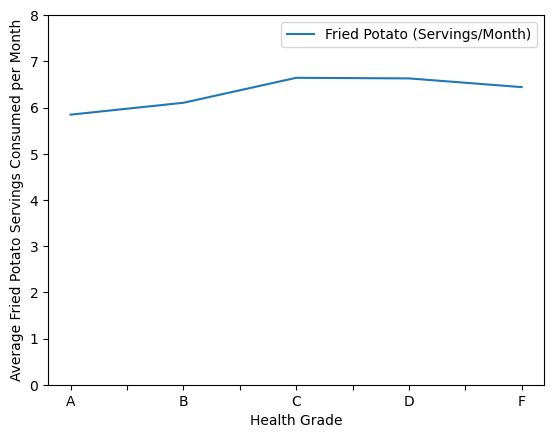

In [32]:
#relations between potatoes and health 
potatohealth = newgroups[["Health Grade", "Fried Potato (Servings/Month)"]]
means = potatohealth.mean()
taterplot = means.plot(kind = 'line', ylim=(0,8) )
taterplot.set_xlabel('Health Grade')
taterplot.set_ylabel('Average Fried Potato Servings Consumed per Month')

C:\Users\slbow\AppData\Local\Temp\ipykernel_18752\412079048.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  meang = greenhealth.mean()


Text(0, 0.5, 'Average Vegetable Servings Consumed per Month')

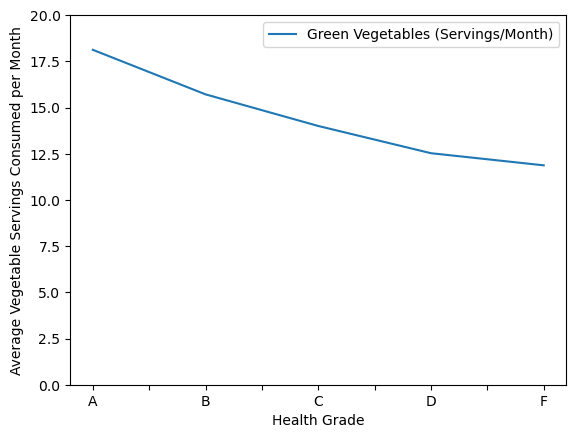

In [53]:
#Vegetables
greenhealth = newgroups[['Health Grade', 'Green Vegetables (Servings/Month)']]
meang = greenhealth.mean()
veggieplot = meang.plot(kind='line', ylim=(0,20))
veggieplot.set_xlabel('Health Grade')
veggieplot.set_ylabel('Average Vegetable Servings Consumed per Month')

C:\Users\slbow\AppData\Local\Temp\ipykernel_18752\1409439338.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  meanf = fruithealth.mean()


Text(0, 0.5, 'Average Fruit Servings Consumed per Month')

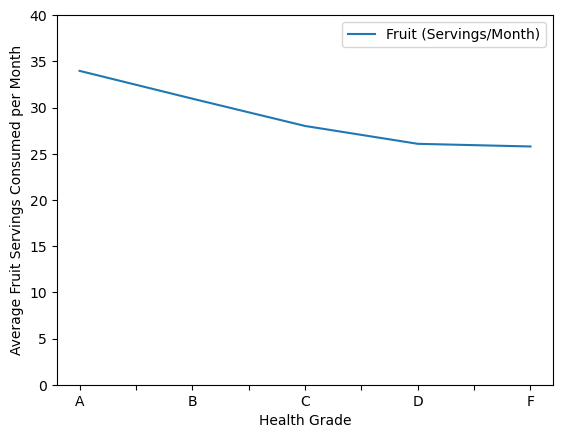

In [34]:
#Fruits
fruithealth = newgroups[['Health Grade', 'Fruit (Servings/Month)']]
meanf = fruithealth.mean()
fruitplot = meanf.plot(kind='line', ylim=(0,40))
fruitplot.set_xlabel('Health Grade')
fruitplot.set_ylabel('Average Fruit Servings Consumed per Month')

C:\Users\slbow\AppData\Local\Temp\ipykernel_18752\4291064538.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  meana = alchealth.mean()


Text(0, 0.5, 'Average Alcohol Servings Consumed per Month')

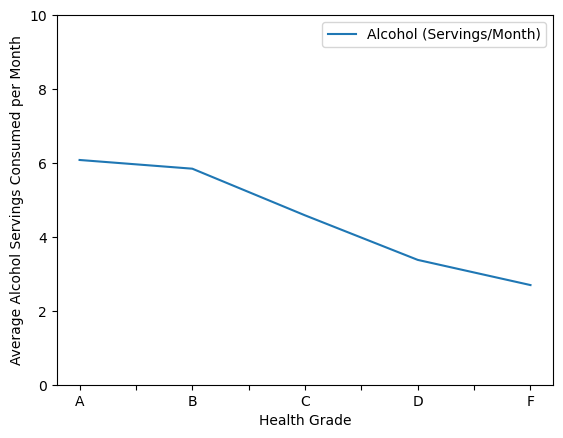

In [35]:
#alcohol
alchealth = newgroups[['Health Grade', 'Alcohol (Servings/Month)']]
meana = alchealth.mean()
alcplot = meana.plot(kind='line', ylim=(0,10))
alcplot.set_xlabel('Health Grade')
alcplot.set_ylabel('Average Alcohol Servings Consumed per Month')

C:\Users\slbow\AppData\Local\Temp\ipykernel_18752\3320517404.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  meant = tothealth.mean()


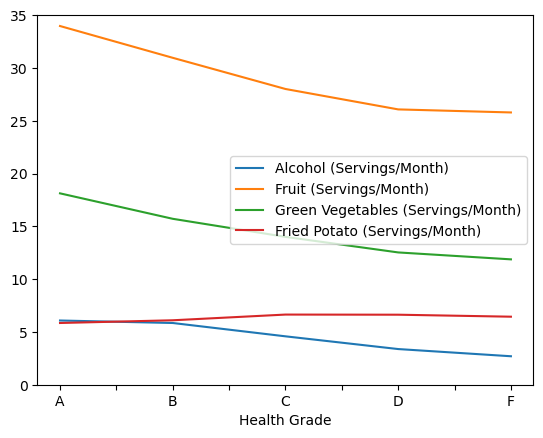

In [36]:
#All together 
tothealth = newgroups[['Health Grade', 'Alcohol (Servings/Month)', 'Fruit (Servings/Month)', 'Green Vegetables (Servings/Month)',"Fried Potato (Servings/Month)"]]
meant = tothealth.mean()
totplot = meant.plot(kind='line', ylim=(0,35))
plt.show()

### Analysis
-----
I'm looking into the relationship that many different types of consumable items have on overall health. The first thing I had to do with this dataset was define how I was measuring overall health. The starting point was a simple categorical string defining five levels of health from "poor" to "Excellent". But these weren't in any order so I had to rename the columns to health grades so I could put them in sequences, with excellent being best and poor being worst. From this if I sequence the means at each health level, we can see how, for example, people that eat more vegetables tend to have better general health. This trend also sensibly holds for fruits. While there doesn't appear to be much relationship between health and consumption of fried potatoes, we see the relationship between general health and alcohol consumption is also positive. 

<Axes: title={'center': 'Fried Potato (Servings/Month)'}, xlabel='Health Grade'>

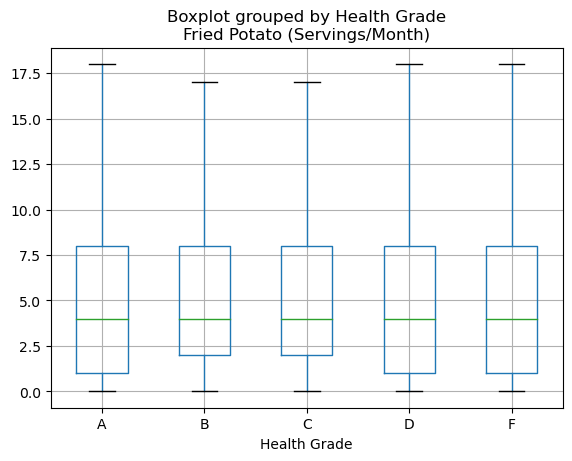

In [43]:
#Boxplots and Anovas; starting with potatoes
#boxplot
healthgrade_df.boxplot('Fried Potato (Servings/Month)', by = "Health Grade",showfliers = False)
#Outliers removed for readability

In [39]:
#anova
tata = healthgrade_df[healthgrade_df['Health Grade']=='A']['Fried Potato (Servings/Month)']
tatb = healthgrade_df[healthgrade_df['Health Grade']=='B']['Fried Potato (Servings/Month)']
tatc = healthgrade_df[healthgrade_df['Health Grade']=='C']['Fried Potato (Servings/Month)']
tatd = healthgrade_df[healthgrade_df['Health Grade']=='D']['Fried Potato (Servings/Month)']
tatf = healthgrade_df[healthgrade_df['Health Grade']=='F']['Fried Potato (Servings/Month)']
sp.f_oneway(tata, tatb,tatc,tatd,tatf)

F_onewayResult(statistic=105.97714251218163, pvalue=2.1889258475293262e-90)

<Axes: title={'center': 'Green Vegetables (Servings/Month)'}, xlabel='Health Grade'>

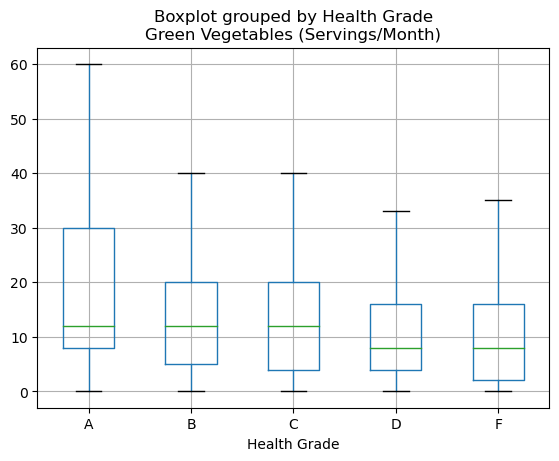

In [45]:
#Vegetables
healthgrade_df.boxplot('Green Vegetables (Servings/Month)', by = "Health Grade",showfliers = False)

In [46]:
#Anova veggies
vega = healthgrade_df[healthgrade_df['Health Grade']=='A']['Green Vegetables (Servings/Month)']
vegb = healthgrade_df[healthgrade_df['Health Grade']=='B']['Green Vegetables (Servings/Month)']
vegc = healthgrade_df[healthgrade_df['Health Grade']=='C']['Green Vegetables (Servings/Month)']
vegd = healthgrade_df[healthgrade_df['Health Grade']=='D']['Green Vegetables (Servings/Month)']
vegf = healthgrade_df[healthgrade_df['Health Grade']=='F']['Green Vegetables (Servings/Month)']
sp.f_oneway(vega, vegb,vegc,vegd,vegf)

F_onewayResult(statistic=1164.959978472137, pvalue=0.0)

<Axes: title={'center': 'Fruit (Servings/Month)'}, xlabel='Health Grade'>

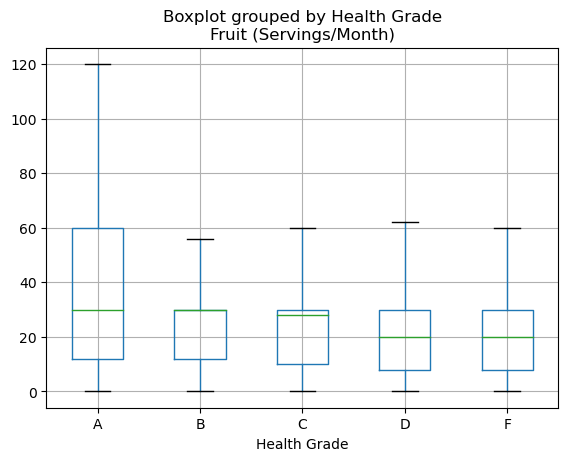

In [49]:
#Fruits plot
healthgrade_df.boxplot('Fruit (Servings/Month)', by = "Health Grade",showfliers = False)

In [50]:
#Fruit Anova
frta = healthgrade_df[healthgrade_df['Health Grade']=='A']['Fruit (Servings/Month)']
frtb = healthgrade_df[healthgrade_df['Health Grade']=='B']['Fruit (Servings/Month)']
frtc = healthgrade_df[healthgrade_df['Health Grade']=='C']['Fruit (Servings/Month)']
frtd = healthgrade_df[healthgrade_df['Health Grade']=='D']['Fruit (Servings/Month)']
frtf = healthgrade_df[healthgrade_df['Health Grade']=='F']['Fruit (Servings/Month)']
sp.f_oneway(frta, frtb,frtc,frtd,frtf)

F_onewayResult(statistic=860.8349855276698, pvalue=0.0)

<Axes: title={'center': 'Alcohol (Servings/Month)'}, xlabel='Health Grade'>

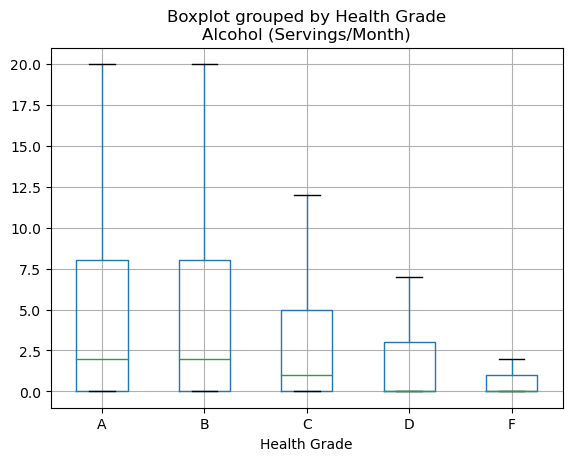

In [51]:
#Alcohol boxplot
healthgrade_df.boxplot('Alcohol (Servings/Month)', by = "Health Grade",showfliers = False)

In [52]:
#Anova Alcohol
alca = healthgrade_df[healthgrade_df['Health Grade']=='A']['Alcohol (Servings/Month)']
alcb = healthgrade_df[healthgrade_df['Health Grade']=='B']['Alcohol (Servings/Month)']
alcc = healthgrade_df[healthgrade_df['Health Grade']=='C']['Alcohol (Servings/Month)']
alcd = healthgrade_df[healthgrade_df['Health Grade']=='D']['Alcohol (Servings/Month)']
alcf = healthgrade_df[healthgrade_df['Health Grade']=='F']['Alcohol (Servings/Month)']
sp.f_oneway(alca, alcb,alcc,alcd,alcf)

F_onewayResult(statistic=1179.1127605886168, pvalue=0.0)

In [57]:
#Ordinal Data for regression analysis
#Higher scores are better

dupehealth = healthgrade_df.rename(columns={'Health Grade': 'Health Score'})
dupehealth['Health Score'] = dupehealth['Health Score'].replace({'A':4,
                                                                 'B':3,
                                                                 'C':2,
                                                                 'D':1,
                                                                 'F':0})


,Unnamed: 0,Health Score,Checkup,Exercise,Heart Disease,Skin Cancer,Other Cancer,Depression,Diabetes,Arthritis,Sex,Age Category,Height (cm),Weight (kg),BMI,Smoking History,Alcohol (Servings/Month),Fruit (Servings/Month),Green Vegetables (Servings/Month),Fried Potato (Servings/Month)
0,0,0,<2,No,No,No,No,No,None,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,1,3,<1,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,2,3,<1,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,3,0,<1,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,4,2,<1,No,No,No,No,No,None,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [ ]:
#Potato Regression
